<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/2024_HITL_XAI_Pancreas_XGB_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HITL_XAI_Pancreas_XGB_MIN**

authors: jose.bobes, israel.figueirido.arnoso at udc.es

XGBoost with the MINIMUM set of parameters.

# Importing required libraries

In [ ]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import re
print('re: {}'.format(re.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.25.2
re: 2.2.1
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# Cleaning the Pancreas dataset

In [ ]:
# 1. Set the features to be taken into account when training the models (therapy_type is the target).
features = ['ajcc_pathologic_stage',
            'ajcc_pathologic_t',
            'ajcc_pathologic_m',
            'ajcc_pathologic_n',
            'age_at_index',
            #'other_dx',
            #'gender',
            #'race',
            #'ethnicity',
            #'adenocarcinoma_invasion',
            #'histological_type',
            #'person_neoplasm_cancer_status',
            #'year_of_initial_pathologic_diagnosis',
            #'initial_pathologic_diagnosis_method',
            #'surgery_performed_type',
            #'number_of_lymphnodes_positive_by_he',
            #'number_of_lymphnodes_positive_by_ihc',
            #'neoplasm_histologic_grade',
            #'maximum_tumor_dimension',
            #'residual_tumor',
            #'history_of_diabetes',
            #'family_history_of_cancer',
            #'radiation_therapy',
            #'postoperative_rx_tx',
            #'primary_therapy_outcome_success',
            #'new_tumor_events',
            #'days_to_new_tumor_event_after_initial_treatment',
            'therapy_type',
            #'tx_on_clinical_trial',
            #'drug_name',
            #'tobacco_smoking_history',
            #'alcoholic_exposure_category'
]


In [ ]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/tcga_paad_datosRecomendados.csv"

dataset = pd.read_csv(url, sep=';', usecols=features, encoding = "ISO-8859-1")
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

print(dataset.shape)
print(dataset.head())

(185, 6)
  ajcc_pathologic_stage ajcc_pathologic_t ajcc_pathologic_n ajcc_pathologic_m  \
0             Stage IIB                T3                N1                MX   
1             Stage IIB                T3                N1                M0   
2              Stage IB                T2                N0                MX   
3             Stage IIA                T3                N0                M0   
4             Stage IIA                T3                N0                M0   

   age_at_index  therapy_type  
0            77  Chemotherapy  
1            67           NaN  
2            59           NaN  
3            61  Chemotherapy  
4            65  Chemotherapy  


In [ ]:
# 3. Show datatypes
for column, dtype in zip(dataset.columns, dataset.dtypes):
    print(f"{column}:{dtype}")

ajcc_pathologic_stage:object
ajcc_pathologic_t:object
ajcc_pathologic_n:object
ajcc_pathologic_m:object
age_at_index:int64
therapy_type:object


In [ ]:
# 4. Missing Values/ Null Values
dataset_null = dataset.isnull()
print(dataset.isnull().sum())

ajcc_pathologic_stage     3
ajcc_pathologic_t         1
ajcc_pathologic_n         1
ajcc_pathologic_m         0
age_at_index              0
therapy_type             64
dtype: int64


In [ ]:
# 5. Fill in the missing values
#dataset.days_to_death = dataset.days_to_death.fillna(18250) # Asignamos un valor muy alto (50 años)
dataset.ajcc_pathologic_stage = dataset.ajcc_pathologic_stage.fillna('Stage 0')
dataset.ajcc_pathologic_t = dataset.ajcc_pathologic_t.fillna('TX')
dataset.ajcc_pathologic_m = dataset.ajcc_pathologic_m.fillna('MX')
dataset.ajcc_pathologic_n = dataset.ajcc_pathologic_n.fillna('NX')
#dataset.race = dataset.race.fillna('Unknown')
#dataset.ethnicity = dataset.ethnicity.fillna('Unknown')
#dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
dataset.therapy_type = dataset.therapy_type.fillna('Other')
#dataset.number_of_lymphnodes_positive_by_he = dataset.number_of_lymphnodes_positive_by_he.fillna(0)
#dataset.number_of_lymphnodes_positive_by_ihc = dataset.number_of_lymphnodes_positive_by_ihc.fillna(0)
#dataset.days_to_new_tumor_event_after_initial_treatment = dataset.days_to_new_tumor_event_after_initial_treatment.fillna(99999)
#dataset.tx_on_clinical_trial = dataset.tx_on_clinical_trial.fillna('Unknown')
#dataset.drug_name = dataset.drug_name.fillna('None')
#dataset.tobacco_smoking_history = dataset.tobacco_smoking_history.fillna(0)
#dataset.alcoholic_exposure_category = dataset.alcoholic_exposure_category.fillna('None')

#dataset.histological_type = dataset.histological_type.fillna('None')
#dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
#dataset.year_of_initial_pathologic_diagnosis = dataset.year_of_initial_pathologic_diagnosis.fillna(0)
#dataset.initial_pathologic_diagnosis_method = dataset.initial_pathologic_diagnosis_method.fillna('Unknown')
#dataset.surgery_performed_type = dataset.surgery_performed_type.fillna('Unknown')
#dataset.maximum_tumor_dimension = dataset.maximum_tumor_dimension.fillna('Unknown')
#dataset.residual_tumor = dataset.residual_tumor.fillna('Unknown')
#dataset.history_of_diabetes = dataset.history_of_diabetes.fillna('Unknown')
#dataset.family_history_of_cancer = dataset.family_history_of_cancer.fillna('Unknown')
#dataset.radiation_therapy = dataset.radiation_therapy.fillna('Unknown')
#dataset.postoperative_rx_tx = dataset.postoperative_rx_tx.fillna('Unknown')
#dataset.primary_therapy_outcome_success = dataset.primary_therapy_outcome_success.fillna('Unknown')
#dataset.new_tumor_events = dataset.new_tumor_events.fillna('Unknown')

dataset_null = dataset.isnull()
print(dataset.isnull().sum())

ajcc_pathologic_stage    0
ajcc_pathologic_t        0
ajcc_pathologic_n        0
ajcc_pathologic_m        0
age_at_index             0
therapy_type             0
dtype: int64


In [ ]:
# 6. Removing Redundancy
count_duplicates = dataset[dataset.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 34


In [ ]:
# There are 6 duplicates with the columns selected.
dataset[dataset.duplicated()]

,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index,therapy_type
10,Stage IIB,T3,N1,MX,77,Chemotherapy
42,Stage IIB,T3,N1,MX,81,Other
65,Stage IIB,T3,N1,M0,56,Chemotherapy
66,Stage IIB,T3,N1,MX,50,Chemotherapy
68,Stage IIB,T3,N1,M0,64,Chemotherapy
69,Stage IIB,T3,N1,MX,65,Chemotherapy
83,Stage IIB,T3,N1,MX,59,Chemotherapy
84,Stage IIB,T3,N1,MX,77,Chemotherapy
97,Stage IIB,T3,N1,M0,71,Chemotherapy
98,Stage IIB,T3,N1,MX,76,Chemotherapy


# Data Preparation

In [ ]:
# 0. Check the current different therapy types
dataset['therapy_type'].unique()

array(['Chemotherapy', 'Other', 'Vaccine', 'Ancillary', 'Hormone Therapy'],
      dtype=object)

In [ ]:
# 1. Simplify Target with only Chemotherapy or Other
dataset['therapy_type'] = dataset['therapy_type'].replace('Hormone Therapy', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Vaccine', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Ancillary', 'Other')

# check that we only get two values: 'Chemotherapy' and 'Other'
dataset['therapy_type'].unique()

array(['Chemotherapy', 'Other'], dtype=object)

In [ ]:
# 2. Convert categorical variables into numerical.
# Categorical features need to be transformed before they can be used in a model.

dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage 0', 0)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage I', 1)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IA', 2)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IB', 3)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage II', 4)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIA', 5)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIB', 6)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage III', 7)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IV', 8)

dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('TX', 0)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T1', 1)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T2', 2)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T3', 3)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T4', 4)

dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N0', 0)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1', 1)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1b', 2)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('NX', 3)

dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M0', 0)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M1', 1)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('MX', 2)

In [ ]:
# 3. Drop unneeded Features
# Remove therapy_type from the X vector, and keep it as the target.
X = dataset.drop(['therapy_type'], axis=1)
y = dataset['therapy_type']

In [ ]:
# 4. Use One-hot encoding for the rest of categorical features. We get a binary variable for each category.
X_encoded = pd.get_dummies(X)

In [ ]:
# 5. Split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=0.3,random_state=42)

# Create a XGBClassifier model

In [ ]:
# 1. Create a XGBClassifier model
import xgboost as xgb

y_train[y_train == 'Other'] = 0
y_train[y_train == 'Chemotherapy'] = 1

y_test[y_test == 'Other'] = 0
y_test[y_test == 'Chemotherapy'] = 1

xgb_clf = xgb.XGBClassifier(objective="binary:logistic", max_depth=10, n_estimators=50)  #mejor que 2, 50 (REVISAR!)
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
# 2. Predict the response for test dataset
y_xgb_pred = xgb_clf.predict(X_test)

In [ ]:
# error obtaining accuracy score: https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target
# Possible solution: https://stackoverflow.com/questions/65585364/one-class-svm-classification-error-classification-metrics-cant-handle-a-mix-o
y_test = y_test.astype('int')

xgb_acc = metrics.accuracy_score(y_test, y_xgb_pred)
print("XGBOOST accuracy: ", xgb_acc)
# 3. Get a different metrics report
print(metrics.classification_report(y_test, y_xgb_pred))
# TODO(?): ¿cross validation score?

XGBOOST accuracy:  0.625
              precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.60      0.86      0.70        29

    accuracy                           0.62        56
   macro avg       0.65      0.62      0.60        56
weighted avg       0.65      0.62      0.60        56



In [ ]:
# 4. Get feature importances according to XGBClassifier
importances = xgb_clf.feature_importances_    #'gain' type of feature importance by default
pd.Series(importances, index=X.columns).sort_values(ascending=False)  #equal to index=X_encoded.columns

ajcc_pathologic_stage    0.310083
age_at_index             0.193032
ajcc_pathologic_n        0.190910
ajcc_pathologic_m        0.153928
ajcc_pathologic_t        0.152048
dtype: float32

#Permutation Importance

Permutation Importance is an algorithm that computes importance scores
for each of the feature variables of a dataset. The importance measures are determined by computing the sensitivity of a model to random permutations of feature values.

It measures the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature.

In [ ]:
# 1. Install required package
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# 2. Get permutation importance data and show weights
xgb_perm = PermutationImportance(xgb_clf, random_state=42).fit(X_test, y_test)
eli5.show_weights(xgb_perm, feature_names = X_encoded.columns.tolist())

Weight,Feature
0.0643 ± 0.1684,age_at_index
0.0464 ± 0.0580,ajcc_pathologic_stage
0.0143 ± 0.0571,ajcc_pathologic_m
-0.0036 ± 0.0267,ajcc_pathologic_t
-0.0214 ± 0.0267,ajcc_pathologic_n


# Explainability with SHAP

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Explain the model's predictions using SHAP
explainerShap = shap.TreeExplainer(xgb_clf)

# Compute shap_values for X_test
shap_values = explainerShap.shap_values(X_test)

**Pacient 3**
Get the data from patient 3

In [ ]:
paciente3 = X_encoded.loc[[2]]
paciente3

,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index
2,3,2,0,2,59


In [ ]:
y[2]

'Other'

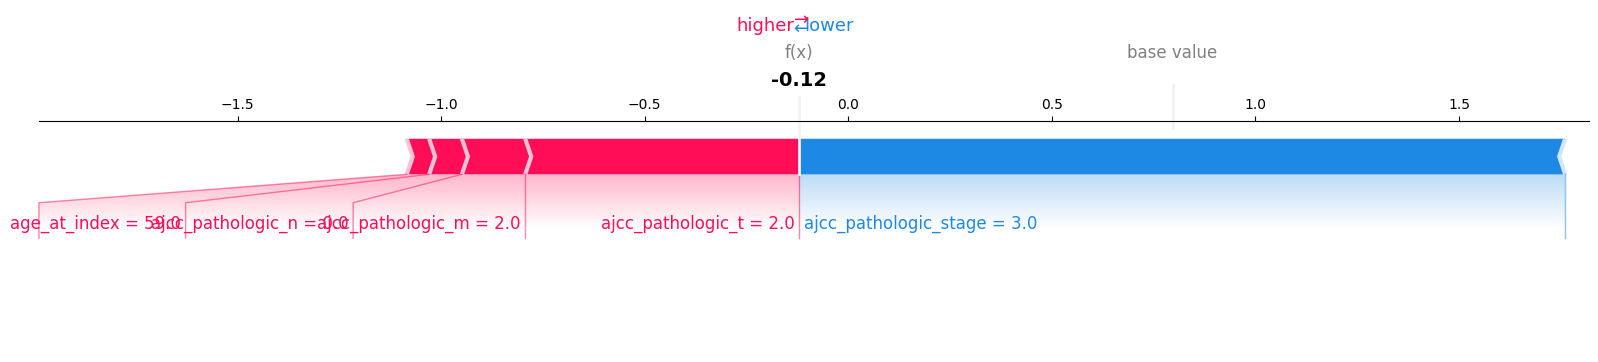

In [ ]:
shap.initjs()
paciente3_shap_values = explainerShap.shap_values(paciente3)

shap.force_plot(explainerShap.expected_value, paciente3_shap_values, paciente3, matplotlib = True, show=False)

In [ ]:
#plt.savefig("shap_paciente3.png")
plt.close()

Paciente 4

In [ ]:
paciente4 = X_encoded.loc[[3]]
paciente4

,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index
3,5,3,0,0,61


In [ ]:
y[3]

'Chemotherapy'

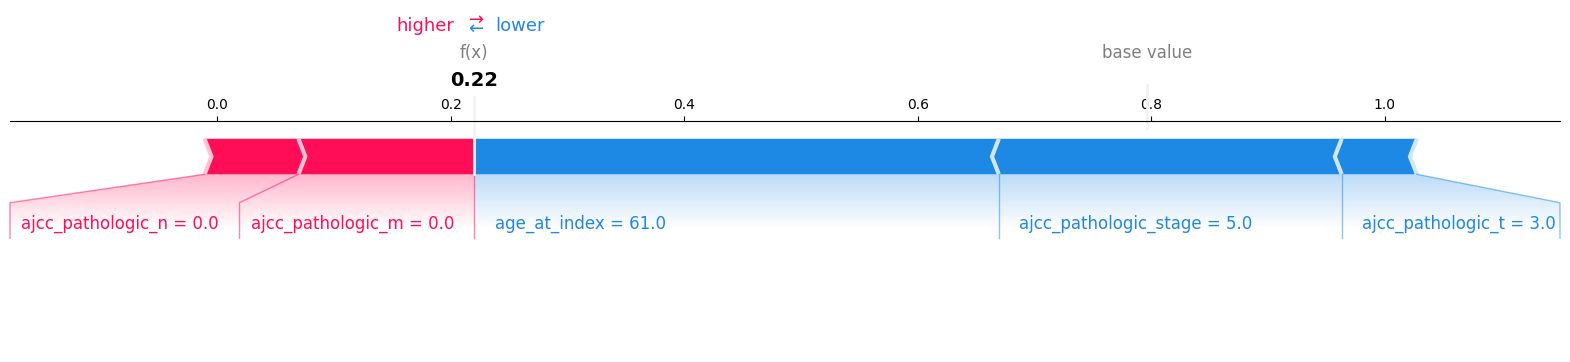

In [ ]:
paciente4_shap_values = explainerShap.shap_values(paciente4)

shap.force_plot(explainerShap.expected_value, paciente4_shap_values, paciente4, matplotlib = True, show=False)

Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect.

Feature values in blue causse to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [ ]:
#plt.savefig("shap_paciente4.png")
plt.close()

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

We could see the contribution of each data into the prediction probability. The redder the colour, the higher the value and vice versa. Also, when the value is on the positive side, it contributes to the class 0 prediction result probability and vice versa.

Variable Importance Plot - Global Interpretation


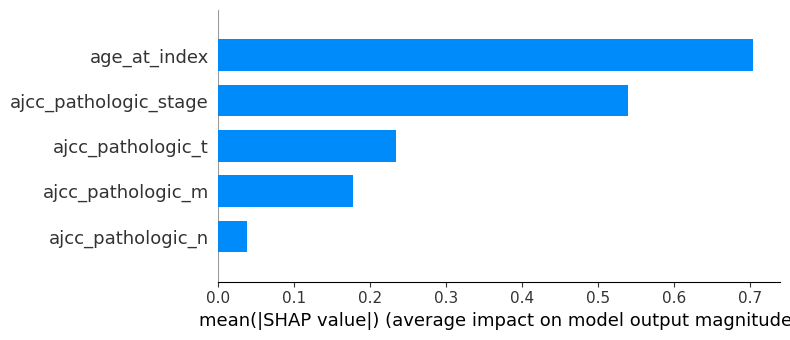

In [ ]:
# Variable importance plot: same for 2 output classes --> https://datascience.stackexchange.com/questions/116979/shap-summary-plot-for-binary-classification-and-multiclass
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=['Chemotherapy','Other'])

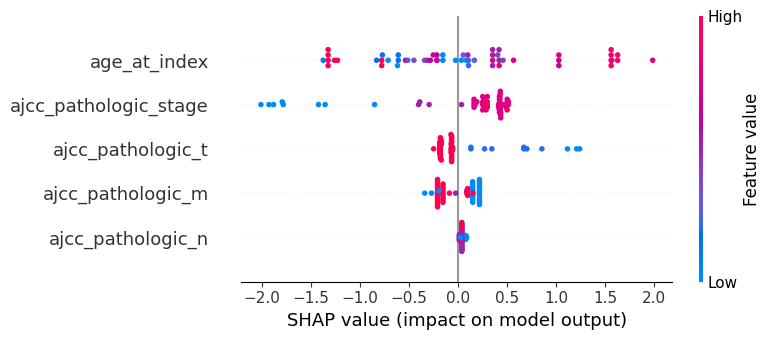

In [ ]:
# Summary plot in an individual sample
shap.summary_plot(shap_values, X_test)

The **partial dependence plot** is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.

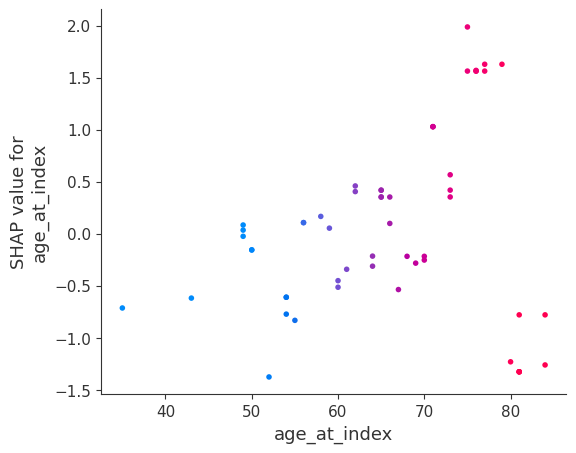

In [ ]:
shap.dependence_plot('age_at_index', shap_values, X_test, interaction_index='age_at_index')

A continuación incluimos un gráfico de decisión:

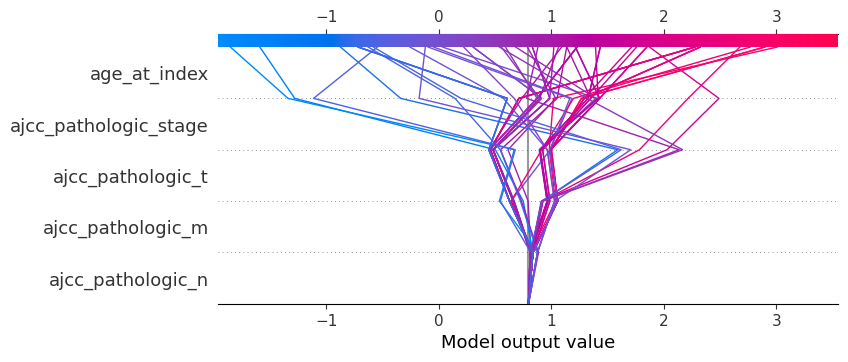

In [ ]:
shap.decision_plot(explainerShap.expected_value, shap_values, feature_names = list(X_encoded.columns))

Y finalmente un gráfico de fuerzas:

In [ ]:
shap.initjs()
shap.force_plot(explainerShap.expected_value, shap_values, feature_names = list(X_encoded.columns))

# Explainability with LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a method for explaining the predictions of any classifier and regressor (model agnostic).

In [ ]:
# Install LIME (Local Interpretable Model-agnostic Explanations)
!pip install lime

# Import required libraries
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=872ccdf81e9d3ebc7a7bab3027b9e48b4f6f778ecb07c892b1eda6d5f1abf41c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# XAI with LIME (Local Interpretable Model-agnostic Explanations)
explainerLime = LimeTabularExplainer(X_encoded.values, feature_names=X_encoded.columns, class_names = ['Chemotherapy', 'Other'], discretize_continuous=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Get the overall most common important features
feature_importance = {}
# Get, for each patient, the most important feature
for idx, i in enumerate(X_encoded.values): #X_encoded.values[:3]
  expl = explainerLime.explain_instance(i, xgb_clf.predict_proba, num_features=20, top_labels=20)

  # Iterate over the set of features
  for jdx, j in enumerate(expl.as_list()):

    # Get feature and value
    splitedj = str(j[0]).split()
    if (len(splitedj) == 5):
      feature_name = splitedj[2]
    else:
      feature_name = splitedj[0]

    feature_importance_value = abs(j[1])

    #print(str(idx) + "-" + str(jdx) + " - feature: " + feature_name + " = " + str(feature_importance_value))

    # Add new value to the feature (average)
    if feature_name in feature_importance:
      previous_value = feature_importance[feature_name]
      new_value = (previous_value + feature_importance_value) / 2
      #print("  *previous_value = " + str(previous_value) + " / new value = " + str(new_value))
    else:
      new_value = feature_importance_value
      #print("new value = " + str(feature_importance_value))

    feature_importance[feature_name] = new_value

# Print dictionary order by feature importance value
dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse = True))

{'ajcc_pathologic_stage': 0.271075004055842,
 'ajcc_pathologic_m': 0.15182691805504822,
 'age_at_index': 0.07641386019453332,
 'ajcc_pathologic_t': 0.03489454052543904,
 'ajcc_pathologic_n': 0.019189212677808865}